<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>


# **Laboratorio 4: Analisis y visualización de Datos**
<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Fernando Becerra </em><br>
    
**Estudiantes**  
César Godoy Delaigue - Pablo Madariaga Orellana - Cristhian Solis Muñoz

### **Introducción**

Este análisis tiene como objetivo visualizar y entender la relación espacial entre la temperatura máxima y la precipitación en distintas estaciones meteorológicas ubicadas en la Región de Coquimbo. Utilizando datos de monitoreo ambiental de diversas estaciones, se busca generar un **mapa bivariado** que combine ambas variables para analizar cómo varían conjuntamente en el espacio.

### **Objetivos**
1. **Visualizar los puntos de monitoreo** en el mapa junto con los límites geográficos de la Región de Coquimbo.
2. **Calcular y analizar estadísticas descriptivas** de las variables de temperatura máxima y precipitación.
3. **Clasificar los datos en cuantiles** para ambas variables, de manera que se pueda generar una representación bivariada en el mapa.
4. **Generar un mapa bivariado** que permita visualizar la relación entre las clases de temperatura y precipitación en las diferentes estaciones meteorológicas.
5. **Interpretar los resultados** obtenidos a partir de la visualización y análisis de los datos espaciales.

### **Fuente de datos**
- **Datos meteorológicos**: Estos incluyen valores diarios de temperatura máxima (°C) y precipitación (mm) registrados en diversas estaciones de monitoreo dentro de la Región de Coquimbo.

https://climatologia.meteochile.gob.cl/


- **Shapefile geográfico**: Límites geográficos de la Región de Coquimbo, utilizados para situar espacialmente las estaciones y generar las visualizaciones necesarias.

https://www.bcn.cl/siit/mapas_vectoriales/index_html

### **Metodología**
1. **Preprocesamiento de los datos**: Normalización y verificación de los valores extremos.
2. **Análisis estadístico**: Cálculo de estadísticas descriptivas para cada variable con el fin de comprender su distribución.
3. **Clasificación bivariada**: Utilización de **cuantiles** para dividir los datos de temperatura y precipitación en clases.
4. **Visualización**: Creación de un **mapa bivariado** que muestre la relación espacial entre ambas variables.

### **Herramientas**
- **Python**: Para la manipulación de los datos y la creación de visualizaciones.
- **GeoPandas**: Para trabajar con datos geoespaciales y realizar uniones espaciales entre las estaciones meteorológicas y los límites geográficos.
- **Matplotlib**: Para graficar los resultados y generar mapas.

### **Descripción del Dataset**

El dataset utilizado en este análisis contiene información de estaciones meteorológicas que monitorean temperatura y precipitación en la Región de Coquimbo. A continuación se detallan las columnas del dataset y su estructura.

### **Estructura del Dataset**
- **Número de registros**: 526,430
- **Número de columnas**: 7

### **Columnas del Dataset**

| Nombre de variable   | Tipo de dato      | Descripción                                                               |
|----------------------|-------------------|---------------------------------------------------------------------------|
| Estacion             | object            | Nombre de la estación meteorológica donde se realizaron las mediciones. No contiene valores nulos. |
| lat                  | float64           | Latitud de la ubicación geográfica de la estación. No contiene valores nulos. |
| long                 | float64           | Longitud de la ubicación geográfica de la estación. No contiene valores nulos. |
| Fecha                | object      | Fecha de la medición registrada, desde 1960 a 2024. No contiene valores nulos. |
| Valor_T_max         | float64           | Valor de la temperatura máxima (°C) registrada en la estación para el día correspondiente. Contiene 64,003 valores no nulos. |
| Valor_T_min         | float64           | Valor de la temperatura mínima (°C) registrada en la estación para el día correspondiente. Contiene 64,512 valores no nulos. |
| Valor_Pp_mm         | float64           | Valor de la precipitación (mm) registrada en la estación para el día correspondiente. Contiene 292,235 valores no nulos. |


### **Notas sobre los Datos**
- Las columnas de temperatura y precipitación contienen valores nulos debido a la falta de registros en algunas estaciones o días específicos.
- Las columnas de latitud y longitud permiten ubicar espacialmente las estaciones en un mapa geográfico, lo que facilita la visualización espacial de los datos.


### **Desarollo**

In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import pyodbc
import sqlalchemy
import unicodedata
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from shapely.geometry import Point
from sklearn.impute import KNNImputer
import contextily as ctx
import geopandas as gpd

### **1. Exploración de Datos (EDA)**

**1.1 Carga de los datos**

Cargamos el dataset y verificamos la estructura de los datos.

In [2]:
# Declaraciónb del DF
ruta = r"C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\Colaborativo\Bivariate_Maps\Data\DataSet_metereologia.csv"
df_importa_data = pd.read_csv(ruta, sep=',', encoding='utf-8')  
print(df_importa_data.head())

     Estacion        lat       long       Fecha  Valor_T_max  Valor_T_min  \
0  AgroChacay -31.863935 -70.616477  1998-02-08          NaN          NaN   
1  AgroChacay -31.863935 -70.616477  1998-03-29          NaN          NaN   
2  AgroChacay -31.863935 -70.616477  1998-04-14          NaN          NaN   
3  AgroChacay -31.863935 -70.616477  1998-04-24          NaN          NaN   
4  AgroChacay -31.863935 -70.616477  1998-05-18          NaN          NaN   

   Valor_Pp_mm  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [3]:
df_importa_data.columns 

Index(['Estacion', 'lat', 'long', 'Fecha', 'Valor_T_max', 'Valor_T_min',
       'Valor_Pp_mm'],
      dtype='object')

In [4]:
df_importa_data.shape

(526430, 7)

In [5]:
df_importa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526430 entries, 0 to 526429
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Estacion     526430 non-null  object 
 1   lat          526430 non-null  float64
 2   long         526430 non-null  float64
 3   Fecha        526430 non-null  object 
 4   Valor_T_max  64003 non-null   float64
 5   Valor_T_min  64512 non-null   float64
 6   Valor_Pp_mm  292235 non-null  float64
dtypes: float64(5), object(2)
memory usage: 28.1+ MB


* Cálculo de Coordenadas Geometricas

***Código importa la clase Point del módulo shapely.geometry y luego calcula una nueva columna llamada 'Coordenadas' en el DataFrame df_importa_data. Esta nueva columna contiene objetos Point que representan las coordenadas geográficas basadas en las columnas 'long' y 'lat' del DataFrame.***

In [6]:
# Calculate the 'Coordenadas' column as a geometry point
df_importa_data['Coordenadas'] = df_importa_data.apply(lambda row: Point(row['long'], row['lat']), axis=1)
print(df_importa_data.head())

     Estacion        lat       long       Fecha  Valor_T_max  Valor_T_min  \
0  AgroChacay -31.863935 -70.616477  1998-02-08          NaN          NaN   
1  AgroChacay -31.863935 -70.616477  1998-03-29          NaN          NaN   
2  AgroChacay -31.863935 -70.616477  1998-04-14          NaN          NaN   
3  AgroChacay -31.863935 -70.616477  1998-04-24          NaN          NaN   
4  AgroChacay -31.863935 -70.616477  1998-05-18          NaN          NaN   

   Valor_Pp_mm                                    Coordenadas  
0          NaN  POINT (-70.61647709322419 -31.86393477004859)  
1          NaN  POINT (-70.61647709322419 -31.86393477004859)  
2          NaN  POINT (-70.61647709322419 -31.86393477004859)  
3          NaN  POINT (-70.61647709322419 -31.86393477004859)  
4          NaN  POINT (-70.61647709322419 -31.86393477004859)  


In [7]:
df_importa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526430 entries, 0 to 526429
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Estacion     526430 non-null  object 
 1   lat          526430 non-null  float64
 2   long         526430 non-null  float64
 3   Fecha        526430 non-null  object 
 4   Valor_T_max  64003 non-null   float64
 5   Valor_T_min  64512 non-null   float64
 6   Valor_Pp_mm  292235 non-null  float64
 7   Coordenadas  526430 non-null  object 
dtypes: float64(5), object(3)
memory usage: 32.1+ MB


In [8]:
# Modificación de formato e investigación de temporalidad
df_importa_data['Fecha'] = pd.to_datetime(df_importa_data['Fecha'])
fecha_min = df_importa_data['Fecha'].min()
fecha_max = df_importa_data['Fecha'].max()
print(f"Rango de fechas disponible: {fecha_min.strftime('%d %B %Y')} - {fecha_max.strftime('%d %B %Y')}")


Rango de fechas disponible: 01 January 1960 - 30 April 2024


In [9]:
df_importa_data.isnull().sum()

Estacion            0
lat                 0
long                0
Fecha               0
Valor_T_max    462427
Valor_T_min    461918
Valor_Pp_mm    234195
Coordenadas         0
dtype: int64

**1.2 Tratamiento de Valores Faltantes**

Dado la exploración y verificación de la cantidad de valores nulos para determinar si necesitamos imputar o eliminar valores faltantes.

In [10]:
# Calculo de valores nulos
df_importa_data['Fecha'] = pd.to_datetime(df_importa_data['Fecha'])
df_importa_data['Año'] = df_importa_data['Fecha'].dt.year
df_importa_data['Mes'] = df_importa_data['Fecha'].dt.month
total_por_grupo = df_importa_data.groupby(['Año', 'Mes']).size().reset_index(name='Total')

# Agrupación de % de valores nulos por variable
nulos_valor_max = df_importa_data.groupby(['Año', 'Mes'])['Valor_T_max'].apply(lambda x: x.isnull().sum()).reset_index()
nulos_valor_max = nulos_valor_max.merge(total_por_grupo, on=['Año', 'Mes'])
nulos_valor_max['Porcentaje_Valor_T_max'] = (nulos_valor_max['Valor_T_max'] / nulos_valor_max['Total']) * 100
pivot_valor_max = nulos_valor_max.pivot_table(index='Año', columns='Mes', values='Porcentaje_Valor_T_max', fill_value=0)

nulos_valor_min = df_importa_data.groupby(['Año', 'Mes'])['Valor_T_min'].apply(lambda x: x.isnull().sum()).reset_index()
nulos_valor_min = nulos_valor_min.merge(total_por_grupo, on=['Año', 'Mes'])
nulos_valor_min['Porcentaje_Valor_T_min'] = (nulos_valor_min['Valor_T_min'] / nulos_valor_min['Total']) * 100
pivot_valor_min = nulos_valor_min.pivot_table(index='Año', columns='Mes', values='Porcentaje_Valor_T_min', fill_value=0)

nulos_valor_Pp_mm = df_importa_data.groupby(['Año', 'Mes'])['Valor_Pp_mm'].apply(lambda x: x.isnull().sum()).reset_index()
nulos_valor_Pp_mm = nulos_valor_Pp_mm.merge(total_por_grupo, on=['Año', 'Mes'])
nulos_valor_Pp_mm['Porcentaje_Valor_Pp_mm'] = (nulos_valor_Pp_mm['Valor_Pp_mm'] / nulos_valor_Pp_mm['Total']) * 100
pivot_valor_Pp_mm = nulos_valor_Pp_mm.pivot_table(index='Año', columns='Mes', values='Porcentaje_Valor_Pp_mm', fill_value=0)

C:\Users\csolis\AppData\Local\Temp\ipykernel_10800\1591359917.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.1, 0, 1, 1])


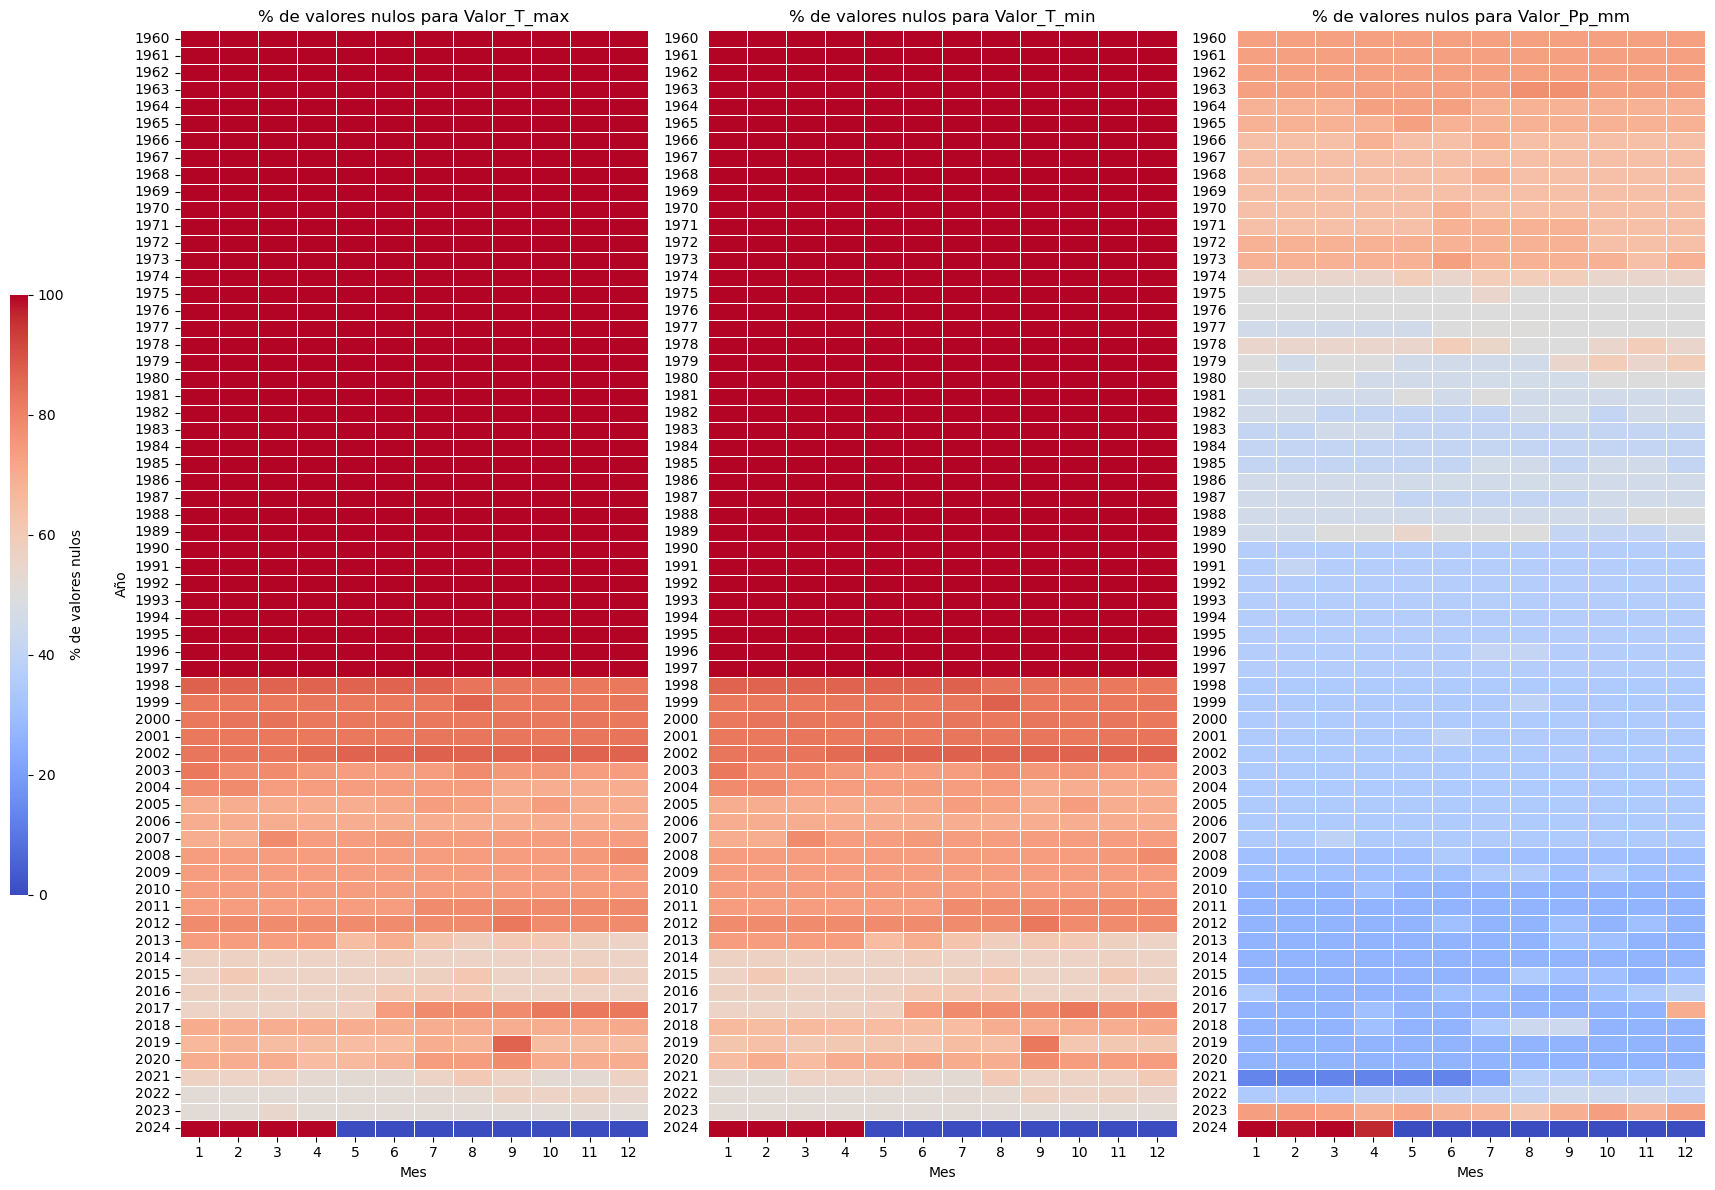

In [12]:
# Visualización de valores nulos
fig, axes = plt.subplots(1, 3, figsize=(18, 12), gridspec_kw={'width_ratios': [1, 1, 1]})
cbar_ax = fig.add_axes([0.05, 0.25, 0.01, 0.5]) 

sns.heatmap(pivot_valor_max,cmap="coolwarm",ax=axes[0],cbar_ax=cbar_ax,cbar_kws={'label': '% de valores nulos'},linewidths=0.5)
axes[0].set_title('% de valores nulos para Valor_T_max')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Año')

sns.heatmap(pivot_valor_min, cmap="coolwarm", ax=axes[1], cbar=False, linewidths=0.5)
axes[1].set_title('% de valores nulos para Valor_T_min')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('')  # Quitar el label del eje Y
axes[1].tick_params(left=False)  # Desactivar los ticks del eje Y

sns.heatmap(pivot_valor_Pp_mm, cmap="coolwarm", ax=axes[2], cbar=False, linewidths=0.5)
axes[2].set_title('% de valores nulos para Valor_Pp_mm')
axes[2].set_xlabel('Mes')
axes[2].set_ylabel('')  # Quitar el label del eje Y
axes[2].tick_params(left=False)  # Desactivar los ticks del eje Y


plt.tight_layout(rect=[0.1, 0, 1, 1]) 
plt.show()


Por resultados de valores nulos, inicialmente se descartan datos anterior a 1997. Igualmente, por mismo concepto de datos faltantes en 2024 se determina utilizar como año maximo 2023.

Bajo estas consideraciones, se toman los ultimos 10  años antes del año maximo (2013-2023)

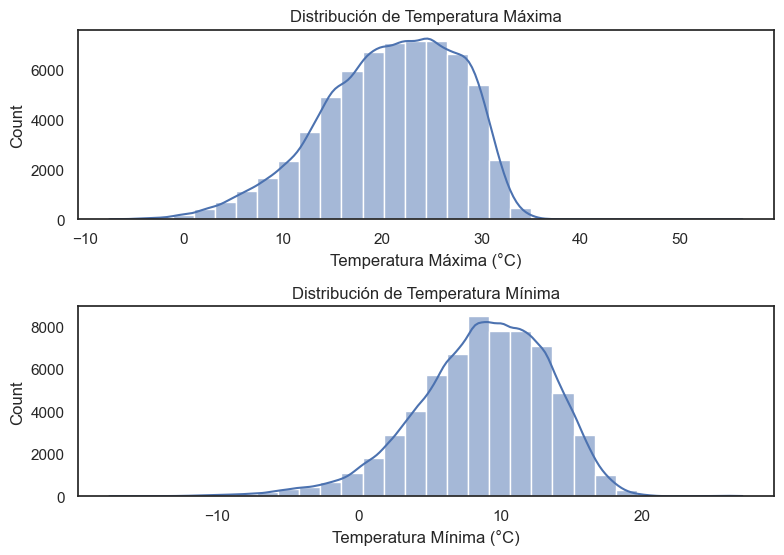

In [40]:
# Visualizar la distribución de las variables numéricas
plt.figure(figsize=(8, 8))

# Gráfico de distribución para Temperatura Máxima
plt.subplot(3, 1, 1)
sns.histplot(df_importa_data['Valor_T_max'], bins=30, kde=True)
plt.title('Distribución de Temperatura Máxima')
plt.xlabel('Temperatura Máxima (°C)')

# Gráfico de distribución para Temperatura Mínima
plt.subplot(3, 1, 2)
sns.histplot(df_importa_data['Valor_T_min'], bins=30, kde=True)
plt.title('Distribución de Temperatura Mínima')
plt.xlabel('Temperatura Mínima (°C)')

# Mostrar todos los gráficos
plt.grid(False) 
plt.tight_layout()
plt.show()

La temperatura más alta en la historia de Chile fue la de Los Ángeles con 42,2°C y el verano con mayor frecuencia de olas de calor fue el año 2023, por lo cual, se procederan a filtrar registros superior a "43"

In [30]:
# Filtro de datos y orden del DF
df_imputado_copia = df_importa_data.copy()
df_imputado_copia['Fecha'] = pd.to_datetime(df_imputado_copia['Fecha'])
df_imputado_copia = df_imputado_copia[(df_imputado_copia['Fecha'].dt.year > 2012) & (df_imputado_copia['Fecha'] < '2024-01-01')]
df_imputado_copia = df_imputado_copia[df_imputado_copia['Valor_T_max'] < 43]
df_imputado_copia.sort_values(by='Fecha', inplace=True)
print(df_imputado_copia.info())
print("Rango de fechas disponible:", df_imputado_copia['Fecha'].min(), "-", df_imputado_copia['Fecha'].max())


<class 'pandas.core.frame.DataFrame'>
Index: 35476 entries, 85257 to 378945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Estacion     35476 non-null  object        
 1   lat          35476 non-null  float64       
 2   long         35476 non-null  float64       
 3   Fecha        35476 non-null  datetime64[ns]
 4   Valor_T_max  35476 non-null  float64       
 5   Valor_T_min  35167 non-null  float64       
 6   Valor_Pp_mm  25903 non-null  float64       
 7   Coordenadas  35476 non-null  object        
 8   Año          35476 non-null  int32         
 9   Mes          35476 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2), object(2)
memory usage: 2.7+ MB
None
Rango de fechas disponible: 2013-01-01 00:00:00 - 2023-12-31 00:00:00


Para evitar la reducción de registros en el periodo a estudio, la **estrategia de imputación datos** faltantes en variables numericas sera mediantes utilización de algoritmo de machine learning **KNN**(vecino más cercano)

In [31]:
# Estadisticos iniciales
columnas_interes = df_imputado_copia.select_dtypes(include=['float64', 'int64']).columns.difference(['Coordenadas', 'lat', 'long'])   
df_imputado_copia[columnas_interes].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Valor_Pp_mm,25903.000000,0.454889,3.759186,0.000000,0.000000,0.000000,0.000000,180.000000
Valor_T_max,35476.000000,21.019275,6.754619,-6.663000,16.540000,21.600000,26.240000,41.700000
Valor_T_min,35167.000000,9.074780,4.717279,-17.600000,6.200000,9.420000,12.490000,27.070000


In [32]:
# Ingresar el KNN en funcion del temporalidad estacional, de lo contrario excluir
df_imputado_copia['Fecha'] = pd.to_datetime(df_imputado_copia['Fecha'])
df_imputado_copia['Año'] = df_imputado_copia['Fecha'].dt.year
df_imputado_copia['Mes'] = df_imputado_copia['Fecha'].dt.month
variables_a_imputar = ['Valor_T_max', 'Valor_T_min', 'Valor_Pp_mm']

# Inicializar el KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df_imputacion = df_imputado_copia[variables_a_imputar + ['Año', 'Mes']].copy()
filas_para_imputar = []

# Imputar utilizando KNN, solo en los datos de los mismos meses y años
for año in df_imputacion['Año'].unique():
    for mes in df_imputacion['Mes'].unique():
        subset = df_imputacion[(df_imputacion['Año'] == año) & (df_imputacion['Mes'] == mes)]
        # Si hay suficientes datos para imputar
        if subset.shape[0] > 1:  # Necesitamos al menos 2 filas para tener vecinos
            # Imputar solo en el subconjunto
            subset_imputed = knn_imputer.fit_transform(subset[variables_a_imputar])
            df_imputacion.loc[subset.index, variables_a_imputar] = subset_imputed
            
            # Agregar los índices de las filas imputadas
            filas_para_imputar.extend(subset.index.tolist())

# Filtrar el DataFrame original para conservar solo las filas que se pueden imputar
df_imputado_copia = df_imputado_copia.loc[filas_para_imputar]

# Asignar los valores imputados de nuevo al DataFrame original
df_imputado_copia[variables_a_imputar] = df_imputacion[variables_a_imputar]

# Eliminar columnas auxiliares si ya no son necesarias
df_imputado_copia.drop(columns=['Año', 'Mes'], inplace=True)

# Verifica la información del DataFrame después de la imputación
print(df_imputado_copia.info())



<class 'pandas.core.frame.DataFrame'>
Index: 35476 entries, 85257 to 378945
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Estacion     35476 non-null  object        
 1   lat          35476 non-null  float64       
 2   long         35476 non-null  float64       
 3   Fecha        35476 non-null  datetime64[ns]
 4   Valor_T_max  35476 non-null  float64       
 5   Valor_T_min  35476 non-null  float64       
 6   Valor_Pp_mm  35476 non-null  float64       
 7   Coordenadas  35476 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 2.4+ MB
None


In [33]:
# Estadisticos post tratamiento de datos faltantes
columnas_interes = df_imputado_copia.select_dtypes(include=['float64', 'int64']).columns.difference(['Coordenadas', 'lat', 'long'])   
df_imputado_copia[columnas_interes].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Valor_Pp_mm,35476.000000,0.470585,3.494656,0.000000,0.000000,0.000000,0.000000,180.000000
Valor_T_max,35476.000000,21.019275,6.754619,-6.663000,16.540000,21.600000,26.240000,41.700000
Valor_T_min,35476.000000,9.021908,4.742777,-17.600000,6.125750,9.400000,12.450000,27.070000


**1.3 Generación de nuevas variables**

Para agregar valor a las posibles conclusiones se agrega una nueva variable que mide la diferencia entre los maximos y minimos de las temperaturas de cada día

In [34]:
# Nuevas variables
df_imputado_copia['Diferencia_T'] = df_imputado_copia['Valor_T_max'] - df_imputado_copia['Valor_T_min']
df_imputado_copia['Media_T'] = (df_imputado_copia['Valor_T_max'] + df_imputado_copia['Valor_T_min'])/2
df_imputado_copia['Fecha_num'] = mdates.date2num(df_imputado_copia['Fecha'])
df_imputado_copia.columns 

Index(['Estacion', 'lat', 'long', 'Fecha', 'Valor_T_max', 'Valor_T_min',
       'Valor_Pp_mm', 'Coordenadas', 'Diferencia_T', 'Media_T', 'Fecha_num'],
      dtype='object')

### **2. Storytelling Metereológico**

Desde un punto de partida, buscamos saber cual ha sido el compartimiento historico de cada variable objetivo

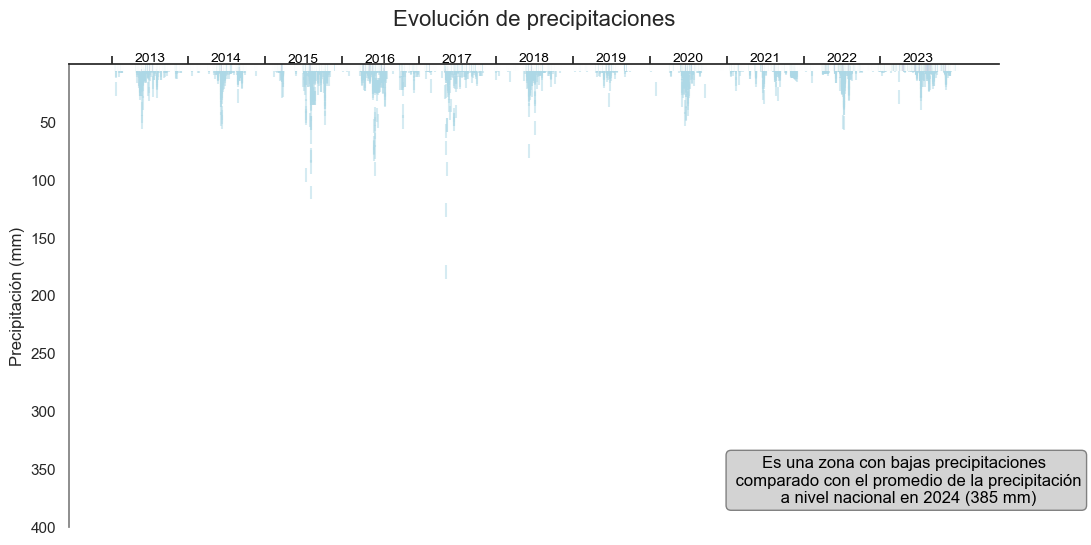

In [41]:
# Evolución de precipitaciones
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
colores = ['lightblue' if valor > 0 else 'white' for valor in df_imputado_copia['Valor_Pp_mm']]

# Grafico
ax.scatter(df_imputado_copia['Fecha'], df_imputado_copia['Valor_Pp_mm'], 
           color=colores, alpha=0.5, s=100, marker='|')

# Títulos y etiquetas
ax.set_title('Evolución de precipitaciones', fontsize=16)
ax.set_xlabel(' ', fontsize=12)
ax.set_ylabel('Precipitación (mm)', fontsize=12)

# Ejes X e Y
plt.gca().invert_yaxis()
ax.set_ylim(400, 0.436488)  # Invertir el rango
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
years = pd.DatetimeIndex(df_imputado_copia['Fecha']).year.unique()
ax.set_xticks(pd.to_datetime(years, format='%Y'))
ax.set_xticklabels([])
for year in years:
    mask = pd.DatetimeIndex(df_imputado_copia['Fecha']).year == year
    mean_value = df_imputado_copia[mask]['Valor_Pp_mm'].mean()
    ax.text(pd.Timestamp(f'{year}-07-01'), mean_value, f'{year}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey') 
ax.spines['bottom'].set_visible(False)

# Anotaciones
ax.annotate('Es una zona con bajas precipitaciones \n comparado con el promedio de la precipitación\n a nivel nacional en 2024 (385 mm)', xy=(0.9, 0.1), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='black',
            bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='grey'))
plt.grid(False) 
plt.show()


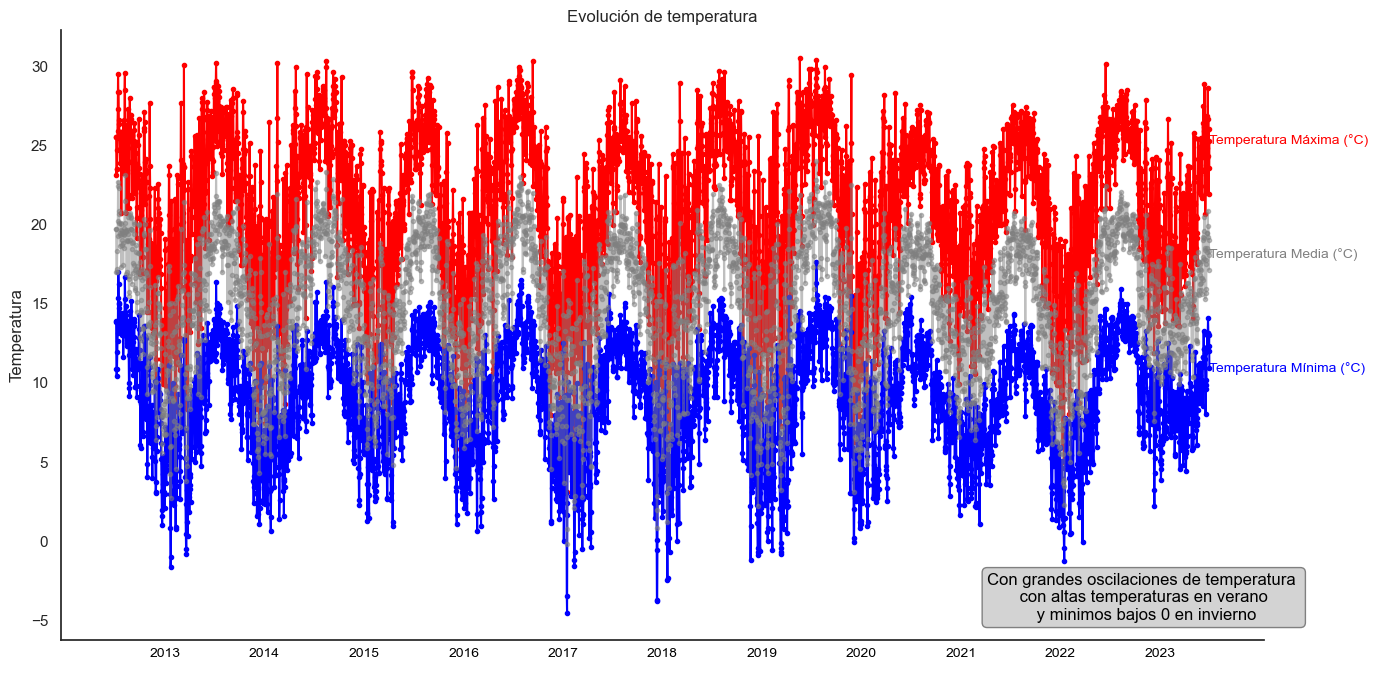

In [42]:
# Agrupar por fecha y calcular la media de las temperaturas
df_grouped = df_imputado_copia.groupby('Fecha').agg({
    'Valor_T_max': 'mean',
    'Valor_T_min': 'mean',
    'Media_T': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.plot(df_grouped['Fecha'], df_grouped['Valor_T_max'], marker='o', markersize=3, linestyle='-', color='red')  
plt.plot(df_grouped['Fecha'], df_grouped['Valor_T_min'], marker='o', markersize=3, linestyle='-', color='blue')  
plt.plot(df_grouped['Fecha'], df_grouped['Media_T'], marker='o', markersize=3, linestyle='-', color='grey', alpha=0.5)  

# Añadir nombres al costado de las líneas
ax.text(df_grouped['Fecha'].iloc[-1], df_grouped['Valor_T_max'].iloc[-1], 'Temperatura Máxima (°C)', 
        ha='left', va='center', fontsize=10, color='red')
ax.text(df_grouped['Fecha'].iloc[-1], df_grouped['Valor_T_min'].iloc[-1], 'Temperatura Mínima (°C)', 
        ha='left', va='center', fontsize=10, color='blue')
ax.text(df_grouped['Fecha'].iloc[-1], df_grouped['Media_T'].iloc[-1], 'Temperatura Media (°C)', 
        ha='left', va='center', fontsize=10, color='grey')

# Obtener años únicos del DataFrame agrupado
years = pd.DatetimeIndex(df_grouped['Fecha']).year.unique()  # Obtener años únicos

# Crear ticks solo para el inicio y final del año
ticks = []
for year in years:
    start_date = pd.Timestamp(f'{year}-01-01')
    end_date = pd.Timestamp(f'{year}-12-31')
    ticks.extend([start_date, end_date])  # Agregar solo el inicio y fin del año

# Establecer los ticks
ax.set_xticks(ticks)

# Formatear las etiquetas de los ticks para que solo muestren el año
ax.set_xticklabels([])  # Limpiar etiquetas actuales
for year in years:
    # Calcular el punto medio entre el inicio y el final del año
    mid_point = pd.Timestamp(f'{year}-07-01')  # Punto medio del año (1 de julio)
    ax.text(mid_point, ax.get_ylim()[0] * 1.2, str(year), ha='center', va='bottom', fontsize=10, color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Evolución de temperatura')
plt.xlabel(' ')
plt.ylabel('Temperatura')

# Anotaciones
ax.annotate('Con grandes oscilaciones de temperatura \n con altas temperaturas en verano \n y minimos bajos 0 en invierno', xy=(0.9, 0.07), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='black',
            bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='grey'))
plt.tight_layout()
plt.grid(False) 
plt.show()


Por lo cual buscamos ver como varian estos parametros ambientales en la región

In [38]:
# Agrupar por 'Estacion' y calcular la media de 'lat' y 'long'
df_estaciones_agrupadas = df_imputado_copia.groupby('Estacion').agg({
    'Valor_T_max': 'max',
    'Valor_Pp_mm': 'mean',
    'lat': 'mean',
    'long': 'mean',
    'Coordenadas': 'first'  # Mantener la primera coordenada
}).reset_index()

df_estaciones_agrupadas.head()

,Estacion,Valor_T_max,Valor_Pp_mm,lat,long,Coordenadas
0,AgroChacay,38.84,0.322487,-31.863935,-70.616477,POINT (-70.61647709322419 -31.86393477004859)
1,AgroChungo,23.05,0.494886,-31.888780,-71.493496,POINT (-71.49349570364026 -31.8887801722468)
2,Booster,30.33,0.166855,-31.732623,-71.198516,POINT (-71.1985164878501 -31.732623010163)
3,Caimanes,35.07,0.472216,-31.930710,-71.138814,POINT (-71.13881357717793 -31.93070977405118)
4,Camisas,35.34,0.384501,-31.883650,-70.957379,POINT (-70.95737858778807 -31.88364975056873)


In [21]:
# --- Cargar el shapefile de las regiones ---
shapefile_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\Colaborativo\Bivariate_Maps\shapefile\comunas.shp'  # Incluye el nombre del archivo .shp

try:
    shape_comunas_gdf = gpd.read_file(shapefile_path)
except Exception as e:
    print(f"Error al cargar el shapefile: {e}")


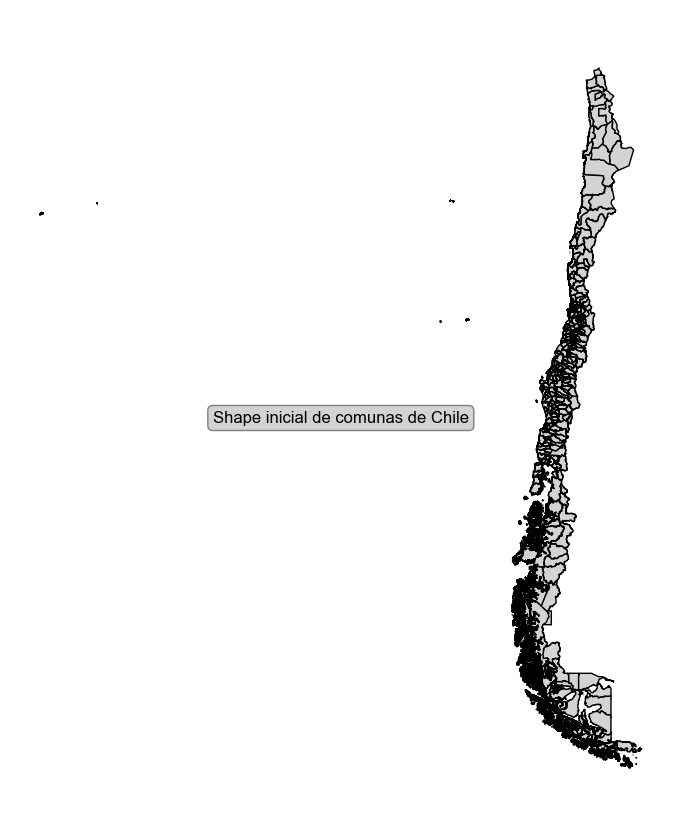

In [43]:
fig, ax = plt.subplots(figsize=(10, 10)) 
shape_comunas_gdf.plot(ax=ax, color='lightgray', edgecolor='black')  
plt.title(' ', fontsize=15)
ax.annotate('Shape inicial de comunas de Chile', xy=(0.5, 0.5), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='black',
            bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='grey'))
ax.axis('off')
plt.gcf().patch.set_facecolor('white')
plt.show()



In [45]:
shape_comunas_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    346 non-null    int64   
 1   shape_leng  346 non-null    float64 
 2   dis_elec    346 non-null    int64   
 3   cir_sena    346 non-null    int64   
 4   cod_comuna  346 non-null    int64   
 5   codregion   346 non-null    int64   
 6   st_area_sh  346 non-null    float64 
 7   st_length_  346 non-null    float64 
 8   Region      346 non-null    object  
 9   Comuna      346 non-null    object  
 10  Provincia   346 non-null    object  
 11  geometry    346 non-null    geometry
dtypes: float64(3), geometry(1), int64(5), object(3)
memory usage: 32.6+ KB


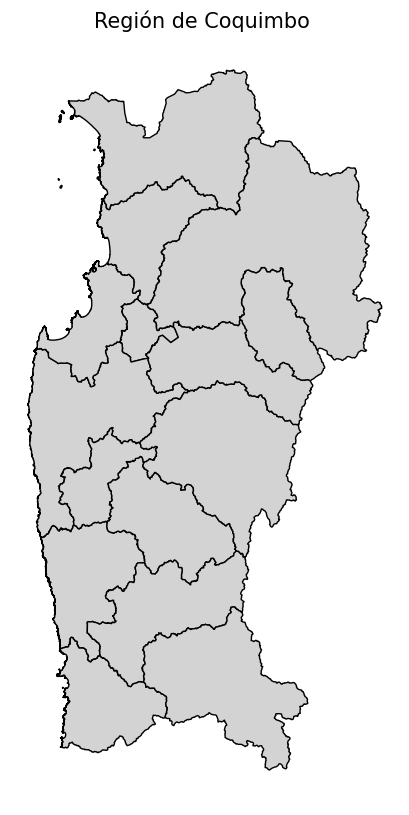

In [23]:
# Filtrar el GeoDataFrame para la Región de Coquimbo 
gdf_coquimbo = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4)]
fig, ax = plt.subplots(figsize=(10, 10)) 
gdf_coquimbo.plot(ax=ax, color='lightgray', edgecolor='black')  
plt.title('Región de Coquimbo ', fontsize=15)
ax.axis('off')
plt.gcf().patch.set_facecolor('white')
plt.show()



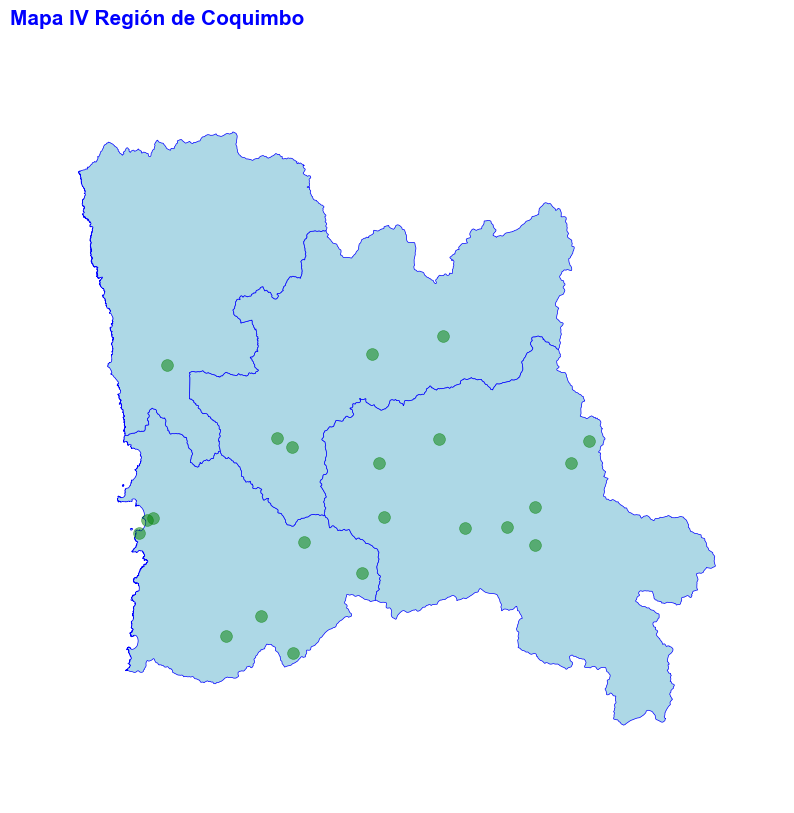

In [24]:
# Puntos de toma de datos
plt.style.use('ggplot')
df_estaciones_agrupadas['Coordenadas'] = df_estaciones_agrupadas.apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf_estaciones = gpd.GeoDataFrame(df_estaciones_agrupadas, geometry='Coordenadas')

# Asegurar que el CRS coincida
gdf_estaciones.set_crs(epsg=4326, inplace=True)  # Asignar CRS si no está asignado
gdf_estaciones = gdf_estaciones.to_crs(gdf_coquimbo.crs)  # Convertir CRS

# Filtrar el GeoDataFrame para la Región de Coquimbo y la Provincia de Choapa
gdf_coquimbo_choapa = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4) & (shape_comunas_gdf['Provincia'] == 'Choapa')]

# Definir los límites del zoom
xmin = -7.993e6
xmax = -7.798e6
ymin = -3.82e6
ymax = -3.63e6

# Graficar el shapefile de la región de Coquimbo
fig, ax = plt.subplots(figsize=(10, 10))
gdf_coquimbo_choapa.plot(ax=ax, color='lightblue', edgecolor='blue')

# Graficar las estaciones en el mismo mapa
gdf_estaciones.plot(ax=ax, marker='o', color='green', markersize=72, alpha=0.5)

# Agregar título al gráfico
ax.set_title('Mapa IV Región de Coquimbo', fontsize=15, fontweight='bold', color='blue', fontname='Arial', loc='left')

# Apagar los ejes del mapa
ax.axis('off')

# Ajustar los límites del mapa para el zoom
ax.set_xlim(xmin, xmax) 
ax.set_ylim(ymin, ymax) 

plt.show()

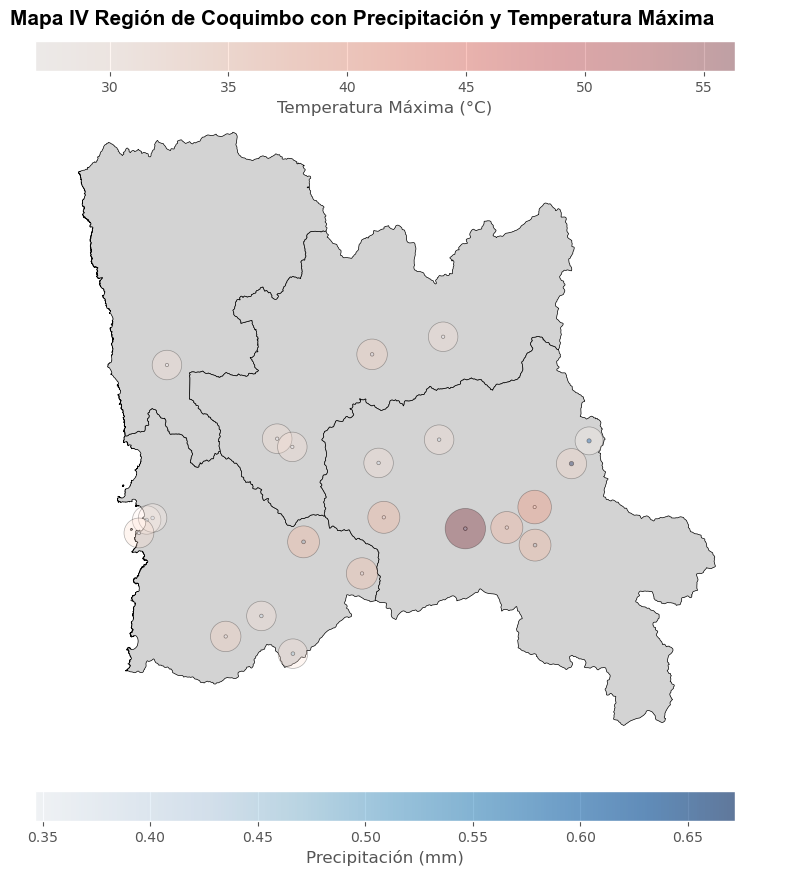

In [25]:
plt.style.use('ggplot')

# Convertir df_estaciones_agrupadas a un GeoDataFrame
df_estaciones_agrupadas['Coordenadas'] = df_estaciones_agrupadas.apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf_estaciones = gpd.GeoDataFrame(df_estaciones_agrupadas, geometry='Coordenadas')

# Asegurar que el CRS coincida
gdf_estaciones.set_crs(epsg=4326, inplace=True)  # Asignar CRS si no está asignado
gdf_estaciones = gdf_estaciones.to_crs(gdf_coquimbo_choapa.crs)  # Convertir CRS

# Filtrar el GeoDataFrame para la Región de Coquimbo y la Provincia de Choapa
gdf_coquimbo_choapa = shape_comunas_gdf[(shape_comunas_gdf['codregion'] == 4) & (shape_comunas_gdf['Provincia'] == 'Choapa')]

# Definir los límites del zoom
xmin = -7.993e6
xmax = -7.798e6
ymin = -3.82e6
ymax = -3.63e6

# Calcular el tamaño de los marcadores en función de la precipitación y temperatura
df_estaciones_agrupadas['Tamaño_P'] = df_estaciones_agrupadas['Valor_Pp_mm'].fillna(0) * 15  # Amplificar el tamaño de los círculos de precipitación
df_estaciones_agrupadas['Tamaño_T'] = df_estaciones_agrupadas['Valor_T_max'].fillna(0) * 15  # Amplificar el tamaño de los círculos de temperatura

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el shapefile de la región de Coquimbo con fondo gris
gdf_coquimbo_choapa.plot(ax=ax, color='lightgray', edgecolor='black')

# Graficar las estaciones en el mismo mapa con tamaños basados en la precipitación
scatter_p = ax.scatter(
    gdf_estaciones.geometry.x, 
    gdf_estaciones.geometry.y, 
    s=df_estaciones_agrupadas['Tamaño_P'], 
    c=df_estaciones_agrupadas['Valor_Pp_mm'].fillna(0),  # Colorear por precipitación
    cmap='Blues',  # Cambia el mapa de colores si es necesario
    alpha=0.6,
    edgecolor='black',
    label='Precipitación (mm)'
)

# Graficar las estaciones en el mismo mapa con tamaños basados en la temperatura máxima
scatter_t = ax.scatter(
    gdf_estaciones.geometry.x, 
    gdf_estaciones.geometry.y, 
    s=df_estaciones_agrupadas['Tamaño_T'], 
    c=df_estaciones_agrupadas['Valor_T_max'].fillna(0),  # Colorear por temperatura máxima
    cmap='Reds',  # Cambia el mapa de colores si es necesario
    alpha=0.3,
    edgecolor='black',
    label='Temperatura Máxima (°C)'
)

# Agregar título al gráfico
ax.set_title('Mapa IV Región de Coquimbo con Precipitación y Temperatura Máxima', fontsize=15, fontweight='bold', color='Black', fontname='Arial', loc='left')

# Apagar los ejes del mapa
ax.axis('off')

# Ajustar los límites del mapa para el zoom
ax.set_xlim(xmin, xmax) 
ax.set_ylim(ymin, ymax)

# Crear un eje para la barra de color de precipitación
cax_p = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # [left, bottom, width, height]
cbar_p = plt.colorbar(scatter_p, cax=cax_p, orientation='horizontal', shrink=0.6)
cbar_p.set_label('Precipitación (mm)', fontsize=12)

# Crear un eje para la barra de color de temperatura máxima
cax_t = fig.add_axes([0.15, 0.85, 0.7, 0.03])  # [left, bottom, width, height]
cbar_t = plt.colorbar(scatter_t, cax=cax_t, orientation='horizontal', shrink=0.6)
cbar_t.set_label('Temperatura Máxima (°C)', fontsize=12)

plt.show()

